In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
auto = pd.read_csv('auto-mpg.csv')
print(auto.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [2]:
for col in auto.columns:
    auto[col] = pd.to_numeric(auto[col], errors ='coerce')

horse_med = auto['horsepower'].median()
auto['horsepower'] = auto['horsepower'].fillna(horse_med)                   # fill missing values with median

auto.rename(columns={"model year" : "model_year"}, inplace=True)            # rename column to remove space


Let's look at the data and see if there are any trends we can see.

Text(0, 0.5, 'MPG')

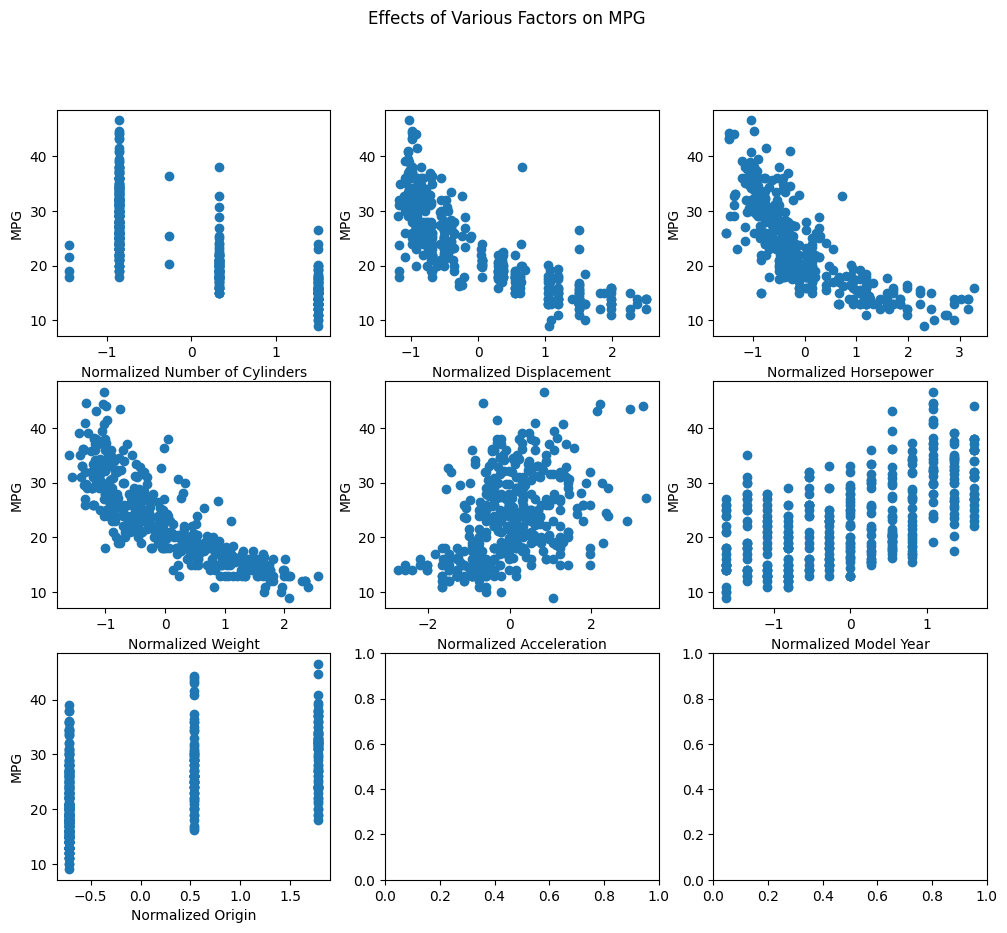

In [3]:
# Normalize and plot the normalized data
auto['norm_cylinders'] = (auto['cylinders'] - auto['cylinders'].mean()) / auto['cylinders'].std()
auto['norm_displacement'] = (auto['displacement'] - auto['displacement'].mean()) / auto['displacement'].std()
auto['norm_horsepower'] = (auto['horsepower'] - auto['horsepower'].mean()) / auto['horsepower'].std()
auto['norm_weight'] = (auto['weight'] - auto['weight'].mean()) / auto['weight'].std()
auto['norm_acceleration'] = (auto['acceleration'] - auto['acceleration'].mean()) / auto['acceleration'].std()
auto['norm_model_year'] = (auto['model_year'] - auto['model_year'].mean()) / auto['model_year'].std()
auto['norm_origin'] = (auto['origin'] - auto['origin'].mean()) / auto['origin'].std()

fig, ax = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle("Effects of Various Factors on MPG")

ax[0][0].plot(auto['norm_cylinders'], auto['mpg'], 'o', label = "Data")           
ax[0][0].set_xlabel('Normalized Number of Cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(auto['norm_displacement'], auto['mpg'], 'o', label = "Data")          
ax[0][1].set_xlabel('Normalized Displacement')
ax[0][1].set_ylabel('MPG')
                  # fill missing values with median
ax[0][2].plot(auto['norm_horsepower'], auto['mpg'], 'o', label = "Data")           
ax[0][2].set_xlabel('Normalized Horsepower')
ax[0][2].set_ylabel('MPG')

ax[1][0].plot(auto['norm_weight'], auto['mpg'], 'o', label = "Data")          
ax[1][0].set_xlabel('Normalized Weight')
ax[1][0].set_ylabel('MPG')

ax[1][1].plot(auto['norm_acceleration'], auto['mpg'], 'o', label = "Data")           
ax[1][1].set_xlabel('Normalized Acceleration')
ax[1][1].set_ylabel('MPG')

ax[1][2].plot(auto['norm_model_year'], auto['mpg'], 'o', label = "Data")           
ax[1][2].set_xlabel('Normalized Model Year')
ax[1][2].set_ylabel('MPG')

ax[2][0].plot(auto['norm_origin'], auto['mpg'], 'o', label = "Data")           
ax[2][0].set_xlabel('Normalized Origin')
ax[2][0].set_ylabel('MPG')

Now let's use statsmodels to fit a linear regression model to the data and see which terms are significant.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  car name  norm_cylinders  norm_displacement  \
0          70       1       NaN        1.496308           1.089233   
1          70       1       NaN        1.496308           1.501624   
2          70       1       NaN        1.496308           1.194728   
3          70       1       NaN        1.496308           1.060461   
4          70       1       NaN        1.496308           1.041280   

   norm_horsepower  norm_weight  norm_acceleration  norm_model_year  \
0         0.672271     0.630077          -1.293870        -1.625381   
1         1.5879

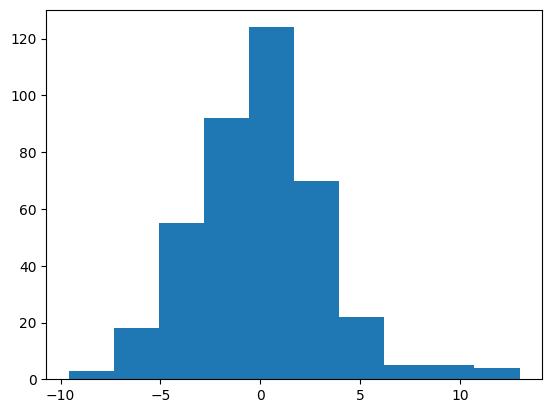

In [4]:
# Fit a linear regression model to all parameters
model = smf.ols('mpg ~ norm_cylinders + norm_displacement + norm_horsepower + norm_weight + norm_acceleration + norm_model_year + norm_origin', data=auto)
model = model.fit()

# Predict values
auto_pred = model.predict()

# Add this prediction to the DataFrame
auto['mpg_pred'] = auto_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
auto['mpg_residual'] = auto['mpg'] - auto['mpg_pred']

print(auto.head())
print(model.summary())

# histogram of the residuals
plt.hist(auto['mpg_residual'])
# standard deviation of residuals
print(auto['mpg_residual'].std())

Now let's remove the insignificant terms and see if we can improve the model.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  car name  norm_cylinders  norm_displacement  \
0          70       1       NaN        1.496308           1.089233   
1          70       1       NaN        1.496308           1.501624   
2          70       1       NaN        1.496308           1.194728   
3          70       1       NaN        1.496308           1.060461   
4          70       1       NaN        1.496308           1.041280   

   norm_horsepower  norm_weight  norm_acceleration  norm_model_year  \
0         0.672271     0.630077          -1.293870        -1.625381   
1         1.5879

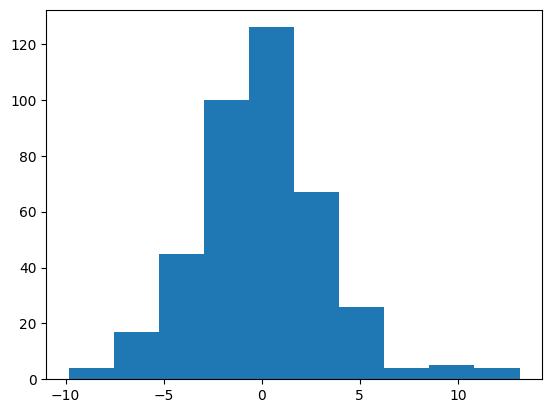

In [5]:
# Fit a linear regression model to only significant parameters
model2 = smf.ols('mpg ~ norm_displacement + norm_weight + norm_model_year + norm_origin', data=auto)
model2 = model2.fit()

# Predict values
auto_pred2 = model2.predict()

# Add this prediction to the DataFrame
auto['mpg_pred2'] = auto_pred2
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
auto['mpg_residual2'] = auto['mpg'] - auto['mpg_pred2']

print(auto.head())
print(model2.summary())

# histogram of the residuals
plt.hist(auto['mpg_residual2'])
# standard deviation of residuals
print(auto['mpg_residual2'].std())

The standard deviation of the residuals is nearly the same without the insignificant terms.

Now let's add interaction terms and see if we can reduce the standard deviation of the residuals.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  car name  norm_cylinders  ...  norm_weight  \
0          70       1       NaN        1.496308  ...     0.630077   
1          70       1       NaN        1.496308  ...     0.853259   
2          70       1       NaN        1.496308  ...     0.549778   
3          70       1       NaN        1.496308  ...     0.546236   
4          70       1       NaN        1.496308  ...     0.565130   

   norm_acceleration  norm_model_year  norm_origin   mpg_pred  mpg_residual  \
0          -1.293870        -1.625381    -0.714246  15.008301      2.991699   
1     

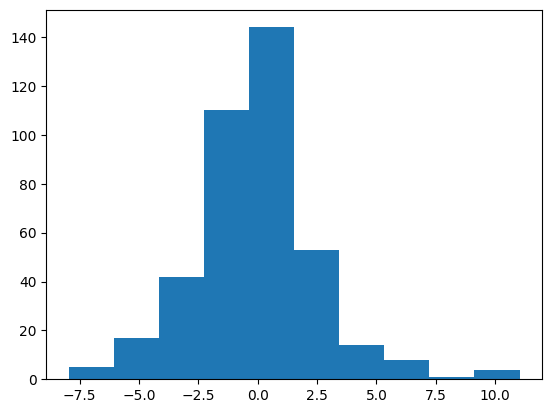

In [6]:
# Fit a linear regression model to all parameters and interaction terms
model_inter = smf.ols('mpg ~ norm_cylinders + norm_displacement + norm_horsepower + norm_weight + norm_acceleration + norm_model_year + norm_origin + norm_cylinders:norm_displacement + norm_cylinders:norm_horsepower + norm_cylinders:norm_weight + norm_cylinders:norm_acceleration + norm_cylinders:norm_model_year + norm_cylinders:norm_origin + norm_displacement:norm_horsepower + norm_displacement:norm_weight + norm_displacement:norm_acceleration + norm_displacement:norm_model_year + norm_displacement:norm_origin + norm_horsepower:norm_weight + norm_horsepower:norm_acceleration + norm_horsepower:norm_model_year + norm_horsepower:norm_origin + norm_weight:norm_acceleration + norm_weight:norm_model_year + norm_weight:norm_origin + norm_acceleration:norm_model_year + norm_acceleration:norm_origin + norm_model_year:norm_origin', data=auto)
model_inter = model_inter.fit()

# Predict values
auto_pred_inter = model_inter.predict()

# Add this prediction to the DataFrame
auto['mpg_pred_inter'] = auto_pred_inter
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
auto['mpg_residual_inter'] = auto['mpg'] - auto['mpg_pred_inter']

print(auto.head())
print(model_inter.summary())

# histogram of the residuals
plt.hist(auto['mpg_residual_inter'])
# standard deviation of residuals
print(auto['mpg_residual_inter'].std())

We can see that the standard deviation of the residuals has decreased by a decent amount.

Just like before, let's remove the insignificant terms and see if we can improve the model.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  car name  norm_cylinders  ...  norm_model_year  \
0          70       1       NaN        1.496308  ...        -1.625381   
1          70       1       NaN        1.496308  ...        -1.625381   
2          70       1       NaN        1.496308  ...        -1.625381   
3          70       1       NaN        1.496308  ...        -1.625381   
4          70       1       NaN        1.496308  ...        -1.625381   

   norm_origin   mpg_pred  mpg_residual  mpg_pred2  mpg_residual2  \
0    -0.714246  15.008301      2.991699  15.312573       2.687427   
1 

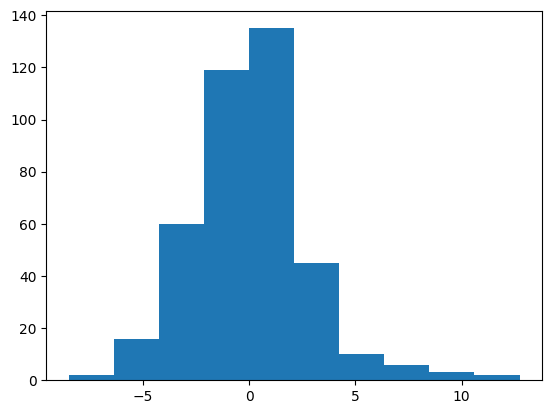

In [7]:
# Fit a linear regression model to only significant parameters and interaction terms but with statistically insignificant terms removed
model_inter2 = smf.ols('mpg ~ norm_horsepower + norm_weight + norm_model_year + norm_origin + norm_displacement:norm_weight + norm_displacement:norm_model_year + norm_acceleration:norm_model_year + norm_acceleration:norm_origin + norm_model_year:norm_origin', data=auto)
model_inter2 = model_inter2.fit()

# Predict values
auto_pred_inter2 = model_inter2.predict()

# Add this prediction to the DataFrame
auto['mpg_pred_inter2'] = auto_pred_inter2
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
auto['mpg_residual_inter2'] = auto['mpg'] - auto['mpg_pred_inter2']

print(auto.head())
print(model_inter2.summary())

# histogram of the residuals
plt.hist(auto['mpg_residual_inter2'])
# standard deviation of residuals
print(auto['mpg_residual_inter2'].std())


As in the linear case, removing the insignificant terms resulted in a similar standard deviation of the residuals.

In [8]:
# print our final dataframe
print(auto.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  car name  norm_cylinders  ...  norm_model_year  \
0          70       1       NaN        1.496308  ...        -1.625381   
1          70       1       NaN        1.496308  ...        -1.625381   
2          70       1       NaN        1.496308  ...        -1.625381   
3          70       1       NaN        1.496308  ...        -1.625381   
4          70       1       NaN        1.496308  ...        -1.625381   

   norm_origin   mpg_pred  mpg_residual  mpg_pred2  mpg_residual2  \
0    -0.714246  15.008301      2.991699  15.312573       2.687427   
1 

In conclusion, we can see that some of the interaction terms are indeed significant enough to improve the model of our data!